# Extracting Cause and Effect to Predict Automotive Accidents
In this notebook, we will be creating different Machine Learning Models to predict car accident severity (as measured by impact on traffic)

### The Problem:
Car accidents come with a great cost: to the drivers and passengers involved in the accidents, to the individuals who must wait in congested highways, and to the transportation industries at large. These are immense tragedies with costly repercussions. This project seeks to develop a model that will tell us where and under what conditions severe car accidents are likely to occur. This information can then be implemented into solutions that will minimize the total costs of car accidents and hopefully save lives.

The model developed herein will be developed and proposed as valuable information for the transportation company Lyft, Inc. to minimze their insurance claims costs by warning drivers that they are in high-risk situations or directing drivers towards lower-risk route options.

### The Data
Data Source: https://osu.app.box.com/v/us-accidents-june20

Metadata: https://smoosavi.org/datasets/us_accidents

#### Descripion
This is a countrywide traffic accident dataset, which covers 49 states of the United States. The data was continuously collected from February 2016 thru June 2020, using several data providers, including two APIs which provide streaming traffic event data. These APIs broadcast traffic events captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 3.5 million accident records in this dataset.

#### Discussion
This data contains 49 total features that can be thought of as 3 main overarching categories: (1) Location, (2) Weather, and (3) Time of Day. Listed Below.

I will incorporate features that will make the most accurate model possible, while remaining robust and relevant to those features that will make for the best formulation of solutions to the problem of severe car accidents (such as location, weather, and time of day). Since I am trying to discover which features are highly correlated with severe car accidents (and thus presenting a possibility of causality), I will be cleaning my data of any collinearity.

The dataset provides us with the assets necessary to make the following inquiries:
- Where are severe car accidents most likely to occur?
- When are severe car accidents most likely to occur?
- Under what conditions are severe car accidents most likely to occur?


##### Acknowledgements:
Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic 
    Accident Dataset.”, arXiv preprint arXiv:1906.05409 (2019).

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. “Accident 
    Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights.” In proceedings of the 27th ACM 
    SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.

# Data Wrangling

In [2]:
# locate then load dataset
import os

os.chdir('/')
os.chdir('Users/petermcmaster/Desktop')
os.getcwd()

'/Users/petermcmaster/Desktop'

In [8]:
import pandas as pd

df = pd.read_csv("US_Accidents.csv")
pd.set_option('display.max_columns', None)
df.head()

/Users/petermcmaster/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (37,44) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


ID    Source    TMC  Severity           Start_Time             End_Time  \
0  A-1  MapQuest  201.0         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  MapQuest  201.0         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  MapQuest  201.0         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  MapQuest  201.0         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  MapQuest  201.0         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  \
0  39.865147 -84.058723      NaN      NaN          0.01   
1  39.928059 -82.831184      NaN      NaN          0.01   
2  39.063148 -84.032608      NaN      NaN          0.01   
3  39.747753 -84.205582      NaN      NaN          0.01   
4  39.627781 -84.188354      NaN      NaN          0.01   

                                         Description  Number  \
0  Right lane blocked due to accident on I-70 Eas...     NaN   
1  Accident on Brice Rd at Tussing Rd. Expect del...  2584.0   
2  Accident on OH-32 State Route 32 Westbound at ...     NaN   
3  Accident on I-75 Southbound at Exits 52 52B US...     NaN   
4  Accident on McEwen Rd at OH-725 Miamisburg Cen...     NaN   

                      Street Side          City      County State     Zipcode  \
0                     I-70 E    R        Dayton  Montgomery    OH       45424   
1                   Brice Rd    L  Reynoldsburg    Franklin    OH  43068-3402   
2             State Route 32    R  Williamsburg    Clermont    OH       45176   
3                     I-75 S    R        Dayton  Montgomery    OH       45417   
4  Miamisburg Centerville Rd    R        Dayton  Montgomery    OH       45459   

  Country    Timezone Airport_Code    Weather_Timestamp  Temperature(F)  \
0      US  US/Eastern         KFFO  2016-02-08 05:58:00            36.9   
1      US  US/Eastern         KCMH  2016-02-08 05:51:00            37.9   
2      US  US/Eastern         KI69  2016-02-08 06:56:00            36.0   
3      US  US/Eastern         KDAY  2016-02-08 07:38:00            35.1   
4      US  US/Eastern         KMGY  2016-02-08 07:53:00            36.0   

   Wind_Chill(F)  Humidity(%)  Pressure(in)  Visibility(mi) Wind_Direction  \
0            NaN         91.0         29.68            10.0           Calm   
1            NaN        100.0         29.65            10.0           Calm   
2           33.3        100.0         29.67            10.0             SW   
3           31.0         96.0         29.64             9.0             SW   
4           33.3         89.0         29.65             6.0             SW   

   Wind_Speed(mph)  Precipitation(in) Weather_Condition  Amenity   Bump  \
0              NaN               0.02        Light Rain    False  False   
1              NaN               0.00        Light Rain    False  False   
2              3.5                NaN          Overcast    False  False   
3              4.6                NaN     Mostly Cloudy    False  False   
4              3.5                NaN     Mostly Cloudy    False  False   

   Crossing  Give_Way  Junction No_Exit  Railway  Roundabout  Station   Stop  \
0     False     False     False   False    False       False    False  False   
1     False     False     False   False    False       False    False  False   
2     False     False     False   False    False       False    False  False   
3     False     False     False   False    False       False    False  False   
4     False     False     False   False    False       False    False  False   

   Traffic_Calming  Traffic_Signal Turning_Loop Sunrise_Sunset Civil_Twilight  \
0            False           False        False          Night          Night   
1            False           False        False          Night          Night   
2            False            True        False          Night          Night   
3            False           False        False          Night            Day   
4            False            True        Fal

In [9]:
df["Source"].value_counts()

MapQuest         2414301
Bing             1034922
MapQuest-Bing      64517
Name: Source, dtype: int64

### DROP (Round 1)
#### Drop the columns which are unnecessary for our Exploratory Data Analysis

##### [Unnecessary Columns] - [Reason]

ID - No added info\
Source - Info useless past line [5]\
TMC - Unnecessary info\
End_Time - Unnecessary info\
End_Lat - Only need Start_Lat\
End_Lng - Only need Start_Lng\
Distance(mi) - Captured in "Severity"\
Description - Verbose, difficult to parse\
Number - Captured in Lat/Long coordinates\
Street - Same reason as number\
Coutry - All are U.S.\
\
\
Drop later?:\
Street\
Side\
Timezone\
Airport_Code\
Weather_Timestamp\
Wind_Chill(F)\
Wind_Direction\
Civil_Twilight\
Nautical_Twilight

In [10]:
df.drop(["ID", "Source", "TMC", "End_Time", "End_Lat", "End_Lng",
          "Distance(mi)", "Description", "Number", 
          "Country"], axis=1, inplace=True)
print(df.shape)
df.tail()


(3513740, 39)


Severity           Start_Time  Start_Lat  Start_Lng  \
3513735         2  2019-08-23 18:03:25   34.00248 -117.37936   
3513736         2  2019-08-23 19:11:30   32.76696 -117.14806   
3513737         2  2019-08-23 19:00:21   33.77545 -117.84779   
3513738         2  2019-08-23 19:00:21   33.99246 -118.40302   
3513739         2  2019-08-23 18:52:06   34.13393 -117.23092   

                   Street Side         City          County State Zipcode  \
3513735      Pomona Fwy E    R    Riverside       Riverside    CA   92501   
3513736             I-8 W    R    San Diego       San Diego    CA   92108   
3513737  Garden Grove Fwy    R       Orange          Orange    CA   92866   
3513738   San Diego Fwy S    R  Culver City     Los Angeles    CA   90230   
3513739          CA-210 W    R     Highland  San Bernardino    CA   92346   

           Timezone Airport_Code    Weather_Timestamp  Temperature(F)  \
3513735  US/Pacific         KRAL  2019-08-23 17:53:00            86.0   
3513736  US/Pacific         KMYF  2019-08-23 18:53:00            70.0   
3513737  US/Pacific         KSNA  2019-08-23 18:53:00            73.0   
3513738  US/Pacific         KSMO  2019-08-23 18:51:00            71.0   
3513739  US/Pacific         KSBD  2019-08-23 20:50:00            79.0   

         Wind_Chill(F)  Humidity(%)  Pressure(in)  Visibility(mi)  \
3513735           86.0         40.0         28.92            10.0   
3513736           70.0         73.0         29.39            10.0   
3513737           73.0         64.0         29.74            10.0   
3513738           71.0         81.0         29.62            10.0   
3513739           79.0         47.0         28.63             7.0   

        Wind_Direction  Wind_Speed(mph)  Precipitation(in) Weather_Condition  \
3513735              W             13.0                0.0              Fair   
3513736             SW              6.0                0.0              Fair   
3513737            SSW             10.0                0.0     Partly Cloudy   
3513738             SW              8.0                0.0              Fair   
3513739             SW              7.0                0.0              Fair   

         Amenity   Bump  Crossing  Give_Way  Junction No_Exit  Railway  \
3513735    False  False     False     False     False   False    False   
3513736    False  False     False     False     False   False    False   
3513737    False  False     False     False      True   False    False   
3513738    False  False     False     False     False   False    False   
3513739    False  False     False     False     False   False    False   

         Roundabout  Station   Stop  Traffic_Calming  Traffic_Signal  \
3513735       False    False  False            False           False   
3513736       False    False  False            False           False   
3513737       False    False  False            False           False   
3513738       False    False  False            False           False   
3513739       False    False  False            False           False   

        Turning_Loop Sunrise_Sunset Civil_Twilight Nautical_Twilight  \
3513735        False            Day            Day               Day   
3513736        False            Day            Day               Day   
3513737        False            Day            Day               Day   
3513738        False            Day            Day               Day   
3513739        False            Day            Day               Day   

        Astronomical_Twilight  
3513735                   Day  
3513736                   Day  
3513737                   Day  
3513738                   Day  
3513739                   Day

In [11]:
import numpy as np

# Create a Table to ID nulls

def missing_data(df):
    # Count number of missing values in a column
    total = df.isnull().sum()
    
    # Get Percentage of missing values
    percent = (df.isnull().sum()/df.isnull().count()*100)
    temp = pd.concat([total, percent], axis=1, keys=['Total','Percent(%)'])
    
    # Create a Type column, that indicates the data-type of the column.
    types = []
    for col in df.columns:
        dtype = str(df[col].dtype)
        types.append(dtype)
    temp['Types'] = types
    
    return(np.transpose(temp))

missing_data(df)

Severity Start_Time Start_Lat Start_Lng  Street    Side  \
Total             0          0         0         0       0       0   
Percent(%)        0          0         0         0       0       0   
Types         int64     object   float64   float64  object  object   

                  City  County   State    Zipcode  Timezone Airport_Code  \
Total              112       0       0       1069      3880         6758   
Percent(%)  0.00318749       0       0  0.0304234  0.110424     0.192331   
Types           object  object  object     object    object       object   

           Weather_Timestamp Temperature(F) Wind_Chill(F) Humidity(%)  \
Total                  43325          65736       1868256       69691   
Percent(%)           1.23302        1.87083         53.17     1.98339   
Types                 object        float64       float64     float64   

           Pressure(in) Visibility(mi) Wind_Direction Wind_Speed(mph)  \
Total             55884          75861          58877          454613   
Percent(%)      1.59044        2.15898        1.67562         12.9382   
Types           float64        float64         object         float64   

           Precipitation(in) Weather_Condition Amenity  Bump Crossing  \
Total                2025881             76143       0     0        0   
Percent(%)            57.656           2.16701       0     0        0   
Types                float64            object    bool  bool     bool   

           Give_Way Junction No_Exit Railway Roundabout Station  Stop  \
Total             0        0       0       0          0       0     0   
Percent(%)        0        0       0       0          0       0     0   
Types          bool     bool  object    bool       bool    bool  bool   

           Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
Total                    0              0            0            116   
Percent(%)               0              0            0     0.00330133   
Types                 bool           bool       object         object   

           Civil_Twilight Nautical_Twilight Astronomical_Twilight  
Total                 116               116                   117  
Percent(%)     0.00330133        0.00330133            0.00332979  
Types              object            object                object

For all data in df, we have Severity, Time, Latitude, and Longitude. Therefore, this is useful information. Questions I want to explore at this point about time and location:

1. Are there hot spots where accidents frequently occur?
2. Are there hot times when accidents frequently occur?

Hypothesis: There exist times/places when/where accidents are most common. Certain characteristics of these times/locations will inform the software solution.

In [14]:
df["Street"].value_counts()

I-5 N                   41264
I-95 N                  35593
I-95 S                  29517
I-10 E                  26107
I-10 W                  25045
                        ...  
N1103 Great River Rd        1
Airdrome Way                1
I-980 E                     1
S Cascade St                1
Cheryl Ave                  1
Name: Street, Length: 176265, dtype: int64

In [18]:
# Are there more accidents on the interstate, freeways, or highways

# Create masks for interstates, freeways, or highways
Street = df["Street"].copy

In [26]:
print(Street)

<bound method NDFrame.copy of 0                             I-70 E
1                           Brice Rd
2                     State Route 32
3                             I-75 S
4          Miamisburg Centerville Rd
                     ...            
3513735                 Pomona Fwy E
3513736                        I-8 W
3513737             Garden Grove Fwy
3513738              San Diego Fwy S
3513739                     CA-210 W
Name: Street, Length: 3513740, dtype: object>


#### Data Cleaning

In [184]:
# City, drop null
city_df = df[df["City"].notnull()]

In [185]:
# Temperature(F), drop null
weather_df = df[df["Temperature(F)"].notnull()]

In [186]:
# Humidity(%), replace NaN w/ median value
weather_df["Humidity(%)"].fillna((df["Humidity(%)"].median()), inplace=True)

In [187]:
# Pressure(in), replace NaN w/ median value
weather_df["Pressure(in)"].fillna((df["Pressure(in)"].median()), inplace=True)

In [188]:
# Visibility(mi), replace NaN w/ median value
weather_df["Visibility(mi)"].fillna((df["Visibility(mi)"].median()), inplace=True)

In [189]:
# Wind_Speed(mph), replace NaN w/ median
weather_df["Wind_Speed(mph)"].fillna((df["Wind_Speed(mph)"].median()), inplace=True)

In [202]:
# Precipitation(in), replace NaN w/ 0
weather_df["Precipitation(in)"].fillna(0.0, inplace=True)

In [190]:
# Zipcode
# drop null Zipcode values from df
df = df[df["Zipcode"].notnull()]

# clean Zipcode values
df["Zipcode"] = df["Zipcode"].str.slice(0,5)
df["Zipcode"] = df["Zipcode"].astype(int)

In [197]:
# Weather_Condition
# Simplify. Create column for weather, 1=rain, 2=snow, 0=other. 
df["Weather_Condition"].replace(np.nan, "Clear", inplace=True)
df.loc[df["Weather_Condition"].str.contains("Rain" or "Drizzle"), "Weather"] = 1
df.loc[df["Weather_Condition"].str.contains("Snow" or "Sleet" or "Hail"), "Weather"] = 2
df.loc[df["Weather"] == None, "Weather"] = 0
df["Weather"].replace(np.nan, 0, inplace = True)
df["Weather"] = df["Weather"].astype(int)

df.drop("Weather_Condition", axis=1, inplace=True)   # Drop "Weather_Condition"

In [198]:
# Start_Time
# Simplify. Get columns for hour, day_of_week, week_of_year, month, and year.

import datetime

df["Start_Time"] =  pd.to_datetime(df["Start_Time"], format="%Y-%m-%d %H:%M:%S")

df["Hour"] = df["Start_Time"].dt.hour
df["Day_of_Week"] = df["Start_Time"].dt.dayofweek
df["Week_of_Year"] = df["Start_Time"].dt.week
df["Month"] = df["Start_Time"].dt.month
df["Year"] = df["Start_Time"].dt.year

df.drop(["Start_Time"], axis=1, inplace=True)   # drop "Start_Time"

In [199]:
# Sunrise_Sunset
# Simplify. Get column for Light where
# Day=0, Twilight=1, and Dusk=2

df = df[df["Sunrise_Sunset"].notnull()]     # Drop null daylight values

df.loc[df["Sunrise_Sunset"].str.contains("Day"), "Light"] = 0           # Sun up means day
df.loc[df["Astronomical_Twilight"].str.contains("Night"), "Light"] = 2  # No light in sky means night
df["Light"] = df["Light"].replace(np.nan, 1).astype(int)                # in between is twilight

df.drop(["Sunrise_Sunset", "Astronomical_Twilight"], axis=1, inplace = True)    # drop old variables

In [200]:
df.head(200)

Severity  Start_Lat  Start_Lng          City      County State  Zipcode  \
0           3  39.865147 -84.058723        Dayton  Montgomery    OH    45424   
1           2  39.928059 -82.831184  Reynoldsburg    Franklin    OH    43068   
2           2  39.063148 -84.032608  Williamsburg    Clermont    OH    45176   
3           3  39.747753 -84.205582        Dayton  Montgomery    OH    45417   
4           2  39.627781 -84.188354        Dayton  Montgomery    OH    45459   
..        ...        ...        ...           ...         ...   ...      ...   
195         2  40.051949 -83.032806      Columbus    Franklin    OH    43214   
196         2  39.772823 -84.135612        Dayton      Greene    OH    45431   
197         2  39.673203 -84.221886        Dayton  Montgomery    OH    45449   
198         2  39.762440 -84.205070        Dayton  Montgomery    OH    45406   
199         2  39.791660 -84.169342        Dayton  Montgomery    OH    45404   

     Temperature(F)  Humidity(%)  Pressure(in)  Visibility(mi)  \
0              36.9         91.0         29.68            10.0   
1              37.9        100.0         29.65            10.0   
2              36.0        100.0         29.67            10.0   
3              35.1         96.0         29.64             9.0   
4              36.0         89.0         29.65             6.0   
..              ...          ...           ...             ...   
195            33.1         92.0         29.77             2.5   
196            31.1         88.0         29.86             6.0   
197            30.9         76.0         29.81             6.0   
198            30.0         92.0         29.82             1.8   
199            31.1         88.0         29.86             6.0   

     Wind_Speed(mph)  Precipitation(in)  Amenity   Bump  Crossing  Give_Way  \
0                7.0               0.02    False  False     False     False   
1                7.0               0.00    False  False     False     False   
2                3.5                NaN    False  False     False     False   
3                4.6                NaN    False  False     False     False   
4                3.5                NaN    False  False     False     False   
..               ...                ...      ...    ...       ...       ...   
195             10.4                NaN    False  False     False     False   
196              5.8                NaN    False  False     False     False   
197              9.2                NaN    False  False     False     False   
198              5.8               0.00    False  False      True     False   
199              5.8                NaN    False  False     False     False   

     Junction  No_Exit  Railway  Roundabout  Station   Stop  Traffic_Calming  \
0       False    False    False       False    False  False            False   
1       False    False    False       False    False  False            False   
2       False    False    False       False    False  False            False   
3       False    False    False       False    False  False            False   
4       False    False    False       False    False  False            False   
..        ...      ...      ...         ...      ...    ...              ...   
195     False    False    False       False    False  False            False   
196     False    False    False       False    False  False            False   
197     False    False    False       False    False  False            False   
198     False    False    False       False    False  False            False   
199     False    False    False       False    False  False            False   

     Traffic_Signal  Turning_Loop  Weather  Hour  Day_of_Week  Week_of_Year  \
0             False         False        1     5            0             6   
1             False         False        1     6            0             6   
2              True         False        0     6            0             6   
3             False      

In [201]:
# POI. Make binary.

# Amenity
df["Amenity"] = df["Amenity"].astype(int)
# Bump
df["Bump"] = df["Bump"].astype(int)
# Crossing
df["Crossing"] = df["Crossing"].astype(int)
# Give_Way
df["Give_Way"] = df["Give_Way"].astype(int)
# Junction
df["Junction"] = df["Junction"].astype(int)
# No_Exit
df["No_Exit"] = df["No_Exit"].astype(int)
# Railway
df["Railway"] = df["Railway"].astype(int)
# Roundabout
df["Roundabout"] = df["Roundabout"].astype(int)
# Station
df["Station"] = df["Station"].astype(int)
# Stop
df["Stop"] = df["Stop"].astype(int)
# Traffic_Calming
df["Traffic_Calming"] = df["Traffic_Calming"].astype(int)
# Traffic_Signal
df["Traffic_Signal"] = df["Traffic_Signal"].astype(int)
# Turning_Loop
df["Turning_Loop"] = df["Turning_Loop"].astype(int)

print(df.dtypes)
df.head()

Severity               int64
Start_Lat            float64
Start_Lng            float64
City                  object
County                object
State                 object
Zipcode                int64
Temperature(F)       float64
Humidity(%)          float64
Pressure(in)         float64
Visibility(mi)       float64
Wind_Speed(mph)      float64
Precipitation(in)    float64
Amenity                int64
Bump                   int64
Crossing               int64
Give_Way               int64
Junction               int64
No_Exit                int64
Railway                int64
Roundabout             int64
Station                int64
Stop                   int64
Traffic_Calming        int64
Traffic_Signal         int64
Turning_Loop           int64
Weather                int64
Hour                   int64
Day_of_Week            int64
Week_of_Year           int64
Month                  int64
Year                   int64
Light                  int64
dtype: object


Severity  Start_Lat  Start_Lng          City      County State  Zipcode  \
0         3  39.865147 -84.058723        Dayton  Montgomery    OH    45424   
1         2  39.928059 -82.831184  Reynoldsburg    Franklin    OH    43068   
2         2  39.063148 -84.032608  Williamsburg    Clermont    OH    45176   
3         3  39.747753 -84.205582        Dayton  Montgomery    OH    45417   
4         2  39.627781 -84.188354        Dayton  Montgomery    OH    45459   

   Temperature(F)  Humidity(%)  Pressure(in)  Visibility(mi)  Wind_Speed(mph)  \
0            36.9         91.0         29.68            10.0              7.0   
1            37.9        100.0         29.65            10.0              7.0   
2            36.0        100.0         29.67            10.0              3.5   
3            35.1         96.0         29.64             9.0              4.6   
4            36.0         89.0         29.65             6.0              3.5   

   Precipitation(in)  Amenity  Bump  Crossing  Give_Way  Junction  No_Exit  \
0               0.02        0     0         0         0         0        0   
1               0.00        0     0         0         0         0        0   
2                NaN        0     0         0         0         0        0   
3                NaN        0     0         0         0         0        0   
4                NaN        0     0         0         0         0        0   

   Railway  Roundabout  Station  Stop  Traffic_Calming  Traffic_Signal  \
0        0           0        0     0                0               0   
1        0           0        0     0                0               0   
2        0           0        0     0                0               1   
3        0           0        0     0                0               0   
4        0           0        0     0                0               1   

   Turning_Loop  Weather  Hour  Day_of_Week  Week_of_Year  Month  Year  Light  
0             0        1     5            0             6      2  2016      2  
1             0        1     6            0             6      2  2016      1  
2             0        0     6            0             6      2  2016      1  
3             0        0     7            0             6      2  2016      1  
4             0        0     7            0             6      2  2016      0

In [214]:
missing_data(df)
print("Looking Good!")

Severity Start_Lat Start_Lng    City  County   State Zipcode  \
Total             0         0         0       0       0       0       0   
Percent(%)        0         0         0       0       0       0       0   
Types         int64   float64   float64  object  object  object   int64   

           Temperature(F) Humidity(%) Pressure(in) Visibility(mi)  \
Total                   0           0            0              0   
Percent(%)              0           0            0              0   
Types             float64     float64      float64        float64   

           Wind_Speed(mph) Precipitation(in) Amenity   Bump Crossing Give_Way  \
Total                    0                 0       0      0        0        0   
Percent(%)               0                 0       0      0        0        0   
Types              float64           float64   int64  int64    int64    int64   

           Junction No_Exit Railway Roundabout Station   Stop Traffic_Calming  \
Total             0       0       0          0       0      0               0   
Percent(%)        0       0       0          0       0      0               0   
Types         int64   int64   int64      int64   int64  int64           int64   

           Traffic_Signal Turning_Loop Weather   Hour Day_of_Week  \
Total                   0            0       0      0           0   
Percent(%)              0            0       0      0           0   
Types               int64        int64   int64  int64       int64   

           Week_of_Year  Month   Year  Light  
Total                 0      0      0      0  
Percent(%)            0      0      0      0  
Types             int64  int64  int64  int64

In [225]:
# 3 data sets total

# Group into a two big cities: (New York, NY), (Los Angeles, CA)
# and the third data set is the original cleaned df.

dfla = df.loc[df["City"]=="Los Angeles"]
dfsea = df.loc[df["City"]=="Seattle"]

In [226]:
dfla.head()

Severity  Start_Lat   Start_Lng         City       County State  \
42866         2  34.078926 -118.289040  Los Angeles  Los Angeles    CA   
42867         3  34.091179 -118.239471  Los Angeles  Los Angeles    CA   
42881         3  34.037239 -118.309074  Los Angeles  Los Angeles    CA   
42883         3  34.027458 -118.274490  Los Angeles  Los Angeles    CA   
42898         3  33.947544 -118.279434  Los Angeles  Los Angeles    CA   

       Zipcode  Temperature(F)  Humidity(%)  Pressure(in)  Visibility(mi)  \
42866    90004            82.9         47.0         29.95            10.0   
42867    90031            82.9         47.0         29.95            10.0   
42881    90018            82.9         47.0         29.95            10.0   
42883    90007            82.9         47.0         29.95            10.0   
42898    90003            80.1         52.0         29.96            10.0   

       Wind_Speed(mph)  Precipitation(in)  Amenity  Bump  Crossing  Give_Way  \
42866              4.6                0.0        0     0         0         0   
42867              4.6                0.0        0     0         0         0   
42881              4.6                0.0        0     0         0         0   
42883              4.6                0.0        0     0         0         0   
42898              9.2                0.0        0     0         0         0   

       Junction  No_Exit  Railway  Roundabout  Station  Stop  Traffic_Calming  \
42866         1        0        0           0        0     0                0   
42867         0        0        0           0        0     0                0   
42881         1        0        0           0        0     0                0   
42883         0        0        0           0        0     0                0   
42898         0        0        0           0        0     0                0   

       Traffic_Signal  Turning_Loop  Weather  Hour  Day_of_Week  Week_of_Year  \
42866               0             0        0    10            1            25   
42867               0             0        0    10            1            25   
42881               0             0        0    10            1            25   
42883               0             0        0    10            1            25   
42898               0             0        0    11            1            25   

       Month  Year  Light  
42866      6  2016      0  
42867      6  2016      0  
42881      6  2016      0  
42883      6  2016      0  
42898      6  2016      0

In [227]:
dfsea.head()

Severity  Start_Lat   Start_Lng     City County State  Zipcode  \
307068         2  47.649269 -122.304649  Seattle   King    WA    98195   
307070         2  47.614941 -122.328667  Seattle   King    WA    98101   
307071         2  47.661308 -122.317719  Seattle   King    WA    98105   
307079         2  47.607956 -122.328491  Seattle   King    WA    98104   
307080         2  47.564072 -122.376190  Seattle   King    WA    98126   

        Temperature(F)  Humidity(%)  Pressure(in)  Visibility(mi)  \
307068            48.9         77.0         30.06            10.0   
307070            48.9         77.0         30.06            10.0   
307071            48.0         86.0         30.07            10.0   
307079            44.1         93.0         30.11            10.0   
307080            42.1         96.0         30.12            10.0   

        Wind_Speed(mph)  Precipitation(in)  Amenity  Bump  Crossing  Give_Way  \
307068              6.9               0.03        0     0         1         0   
307070              6.9               0.03        1     0         0         0   
307071              4.6               0.02        1     0         1         0   
307079              6.9               0.00        1     0         1         0   
307080              6.9               0.00        1     0         1         0   

        Junction  No_Exit  Railway  Roundabout  Station  Stop  \
307068         0        0        0           0        0     0   
307070         0        0        0           0        0     0   
307071         0        0        0           0        1     0   
307079         0        0        0           0        0     0   
307080         0        0        0           0        0     0   

        Traffic_Calming  Traffic_Signal  Turning_Loop  Weather  Hour  \
307068                0               1             0        1    16   
307070                0               0             0        1    17   
307071                0               1             0        0    17   
307079                0               1             0        0    20   
307080                0               1             0        0    20   

        Day_of_Week  Week_of_Year  Month  Year  Light  
307068            2            48     11  2016      1  
307070            2            48     11  2016      1  
307071            2            48     11  2016      1  
307079            2            48     11  2016      2  
307080            2            48     11  2016      2

In [228]:
# Collinearity Heatmap

def multi_collinearity_heatmap(df, figsize=(20,15), annot=False):
    
    sns.set(style="white")   # Set the style of the visualization

    corr = df.corr()         # Create a covariance matrix

    mask = np.zeros_like(corr, dtype=np.bool)       # Generate a mask in the shape of our covariance matrix
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=figsize)   # Set up the matplotlib figure

    cmap = sns.diverging_palette(220, 10, as_cmap=True)         # Generate a custom diverging colormap

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, 
                mask=mask, 
                cmap=cmap, 
                center=0, 
                square=True, 
                linewidths=.5, 
                annot=annot, 
                cbar_kws={"shrink": .5}, 
                vmax=corr[corr != 1.0].max().max());

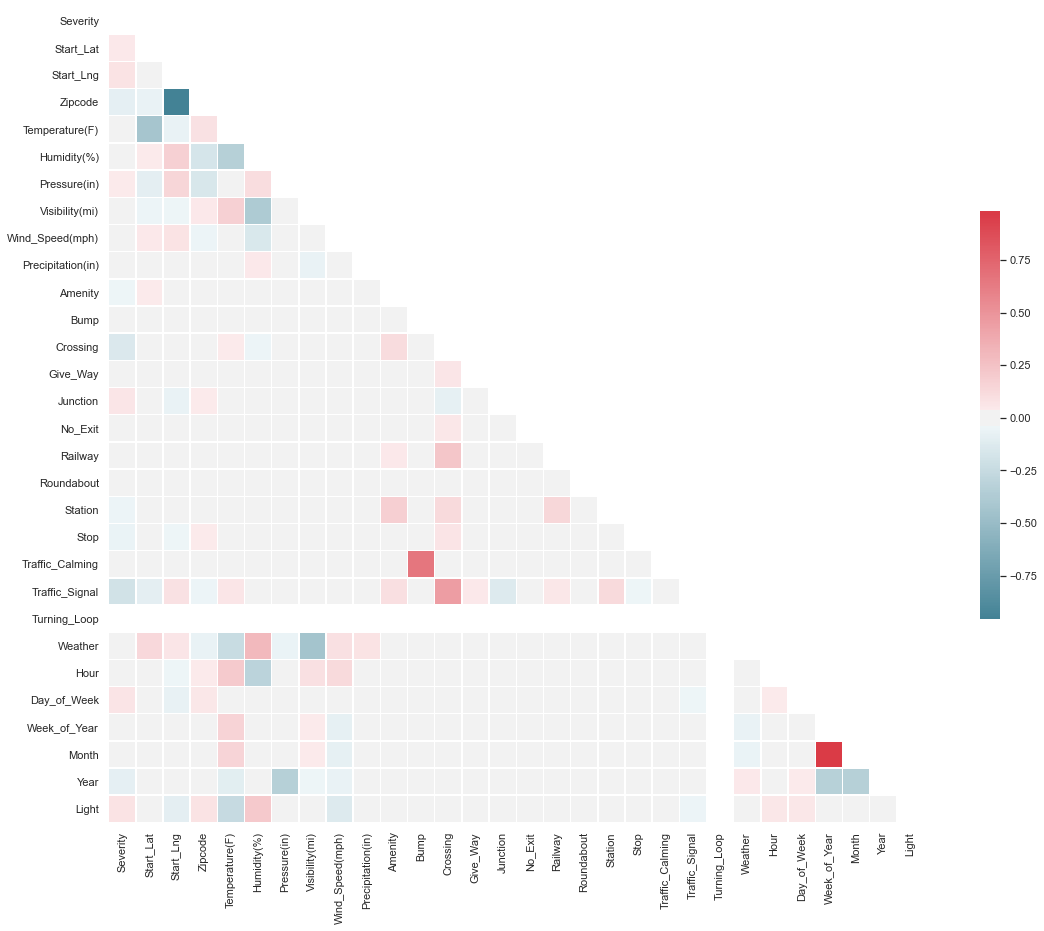

In [229]:
multi_collinearity_heatmap(df)

In [231]:
# Drop Week_of_Year
df.drop("Week_of_Year", axis=1, inplace=True)

In [233]:
df.head(20)

Severity  Start_Lat  Start_Lng          City      County State  Zipcode  \
0          3  39.865147 -84.058723        Dayton  Montgomery    OH    45424   
1          2  39.928059 -82.831184  Reynoldsburg    Franklin    OH    43068   
2          2  39.063148 -84.032608  Williamsburg    Clermont    OH    45176   
3          3  39.747753 -84.205582        Dayton  Montgomery    OH    45417   
4          2  39.627781 -84.188354        Dayton  Montgomery    OH    45459   
5          3  40.100590 -82.925194   Westerville    Franklin    OH    43081   
6          2  39.758274 -84.230507        Dayton  Montgomery    OH    45417   
7          3  39.770382 -84.194901        Dayton  Montgomery    OH    45405   
8          2  39.778061 -84.172005        Dayton  Montgomery    OH    45404   
9          3  40.100590 -82.925194   Westerville    Franklin    OH    43081   
10         3  39.952812 -83.119293      Columbus    Franklin    OH    43228   
11         3  39.932709 -82.830910  Reynoldsburg    Franklin    OH    43068   
12         2  39.737633 -84.149933        Dayton  Montgomery    OH    45420   
13         2  39.790760 -84.241547        Dayton  Montgomery    OH    45406   
14         2  39.972038 -82.913521      Columbus    Franklin    OH    43213   
15         2  39.745888 -84.170410        Dayton  Montgomery    OH    45410   
16         2  39.748329 -84.224007        Dayton  Montgomery    OH    45402   
17         2  39.752174 -84.239952        Dayton  Montgomery    OH    45417   
18         2  39.740669 -84.184135        Dayton  Montgomery    OH    45409   
19         2  39.790703 -84.244461        Dayton  Montgomery    OH    45406   

    Temperature(F)  Humidity(%)  Pressure(in)  Visibility(mi)  \
0             36.9         91.0         29.68            10.0   
1             37.9        100.0         29.65            10.0   
2             36.0        100.0         29.67            10.0   
3             35.1         96.0         29.64             9.0   
4             36.0         89.0         29.65             6.0   
5             37.9         97.0         29.63             7.0   
6             34.0        100.0         29.66             7.0   
7             34.0        100.0         29.66             7.0   
8             33.3         99.0         29.67             5.0   
9             37.4        100.0         29.62             3.0   
10            35.6         93.0         29.64             5.0   
11            37.4        100.0         29.62             3.0   
12            33.8        100.0         29.63             3.0   
13            36.0         89.0         29.65            10.0   
14            37.4        100.0         29.62             3.0   
15            33.8        100.0         29.63             3.0   
16            35.6         99.0         29.65             7.0   
17            36.0         89.0         29.65            10.0   
18            37.4         93.0         29.63            10.0   
19            36.0         89.0         29.65            10.0   

    Wind_Speed(mph)  Precipitation(in)  Amenity  Bump  Crossing  Give_Way  \
0               7.0               0.02        0     0         0         0   
1               7.0               0.00        0     0         0         0   
2               3.5               0.00        0     0         0         0   
3               4.6               0.00        0     0         0         0   
4               3.5               0.00        0     0         0         0   
5               3.5               0.03        0     0         0         0   
6               3.5               0.00        0     0         0         0   
7               3.5               0.00        0     0         0         0   
8               1.2               0.00        0     0         0         0   
9               4.6               0.02        0     0         0         0   
10              5.8               0.00        0     0         0         0   
11              4.6               0.02        0     0 

## Exploratory Data Analysis

### Plots

In [232]:
# import libraries

import seaborn as sns
import matplotlib.pyplot as plt

import folium

from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

### Plots for Time - Hour, Day, Month, Year, Light

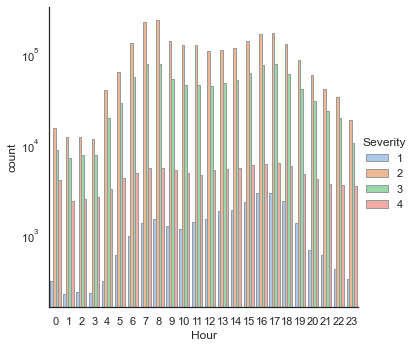

In [238]:
sns.catplot(x="Hour", hue="Severity", kind="count", log=True,
            palette="pastel", edgecolor=".6",
            data=df)

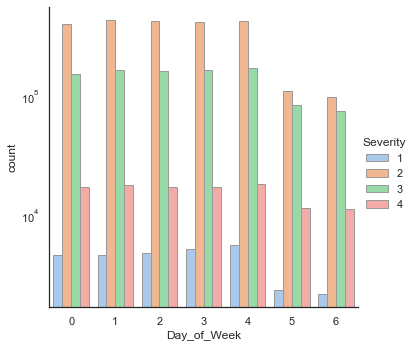

In [235]:
sns.catplot(x="Day_of_Week", hue="Severity", kind="count", log=True,
            palette="pastel", edgecolor=".6",
            data=df)

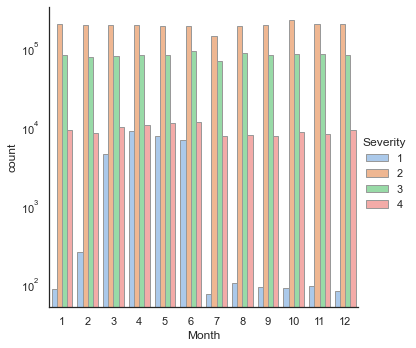

In [236]:
sns.catplot(x="Month", hue="Severity", kind="count", log=True,
            palette="pastel", edgecolor=".6",
            data=df)

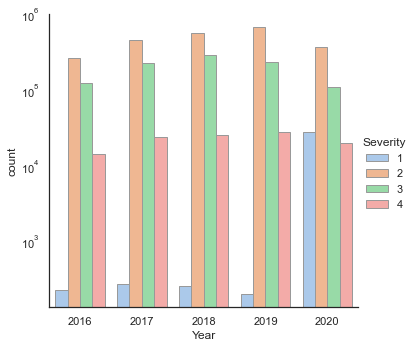

In [237]:
sns.catplot(x="Year", hue="Severity", kind="count", log=True,
            palette="pastel", edgecolor=".6",
            data=df)

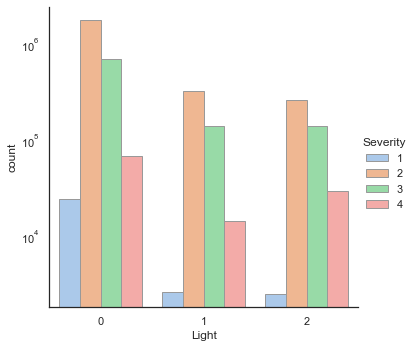

In [241]:
sns.catplot(x="Light", hue="Severity", kind="count", log=True,
            palette="pastel", edgecolor=".6",
            data=df)

### Plots for Weather - Other/Rain/Snow

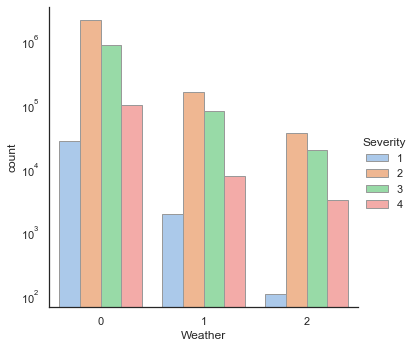

In [240]:
sns.catplot(x="Weather", hue="Severity", kind="count", log=True,
            palette="pastel", edgecolor=".6",
            data=df)

### Maps

In [242]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium imported and installed!')

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.5

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/petermcmaster/opt/anaconda3

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    conda-4.8.5                |   py38h32f6830_1         3.0 MB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    python_abi-3.8             |           1_cp38           4 KB  conda-forge
    vincent-0.4.4              |             py

In [ ]:
!conda install -c plotly plotly=4.10.0
import plotly
print("Plotly imported and installed!")

In [ ]:
!conda install jupyterlab "ipywidgets=7.5"
!pyter labextension install jupyterlab-plotly@4.10.0

import plotly.express as px
print("Plotly Installed")

In [ ]:
#US lat and long values
lat = 31.51073
long = -96.4247

#create empty map
US_map = folium.Map(location = [lat, long], zoom_start = 3)

#create choropleth map
US_map.choropleth(
        geo_data=sf_neighborhoods,
        data=df_hehehe,
        columns=['Neighborhood','Count'],
        key_on = 'feature.properties.DISTRICT',
        fill_color = 'YlOrRd',
        fill_opacity = 0.7,
        line_opacity = 0.2,
        legend_name = 'Crime Rate in San Francisco',
)

#call the map
sf_map

In [244]:
pd.options.plotting.backend = "plotly"

import plotly.express as px

fig = px.choropleth(locations=["CA", "TX", "NY"], locationmode="USA-states", color=[1,2,3], scope="usa")
fig.show()


ValueError: Could not find plotting backend 'plotly'. Ensure that you've installed the package providing the 'plotly' entrypoint, or that the package has a top-level `.plot` method.

### Feature Set

### Train Test Split

### Normalize the Data

### Plots

### Machine Learning Models

### Results, Evaluations, and Discussion

### Conclusion and Recommendation